Khai báo thư viện và đọc thông tin từ file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv(r'C:\Users\Admin\Desktop\BTL_TDA\Data\diem_thi_2021.csv')

Tổng hợp thông tin thủ khoa các khối

In [ ]:
khoi_map = {
    'A': ['Toán', 'Lý', 'Hoá'],
    'B': ['Toán', 'Hoá', 'Sinh'],
    'C': ['Văn', 'Sử', 'Địa'],
    'D': ['Toán', 'Văn', 'Ngoại Ngữ']
}
No1_list = []
for khoi, mon_list in khoi_map.items():
    if all(mon in df.columns for mon in mon_list): 
        if khoi == 'D' and 'ma_ngoai_ngu' in df.columns:  
            df_d = df[df['ma_ngoai_ngu'] == 'N1']  
            if not df_d.empty:  
                df_d[f'TongDiem_{khoi}'] = df_d[mon_list].sum(axis=1)  
                max_score = df_d[f'TongDiem_{khoi}'].idxmax()  

                No1_list.append({
                    'Khoi': khoi,
                    'SBD': df_d.loc[max_score, 'SBD'],
                    'TongDiem': df_d.loc[max_score, f'TongDiem_{khoi}']
                })
        else:
            df[f'TongDiem_{khoi}'] = df[mon_list].sum(axis=1) 
            max_score = df[f'TongDiem_{khoi}'].idxmax()

            No1_list.append({
                'Khoi': khoi,
                'SBD': df.loc[max_score, 'SBD'],
                'TongDiem': df.loc[max_score, f'TongDiem_{khoi}']
            })
thu_khoa_df = pd.DataFrame(No1_list)
print("Danh sách thủ khoa các khối:")
print(thu_khoa_df)

Danh sách thủ khoa các khối:
  Khoi       SBD  TongDiem
0    A   3018071     29.55
1    B  30005407     30.00
2    C  41007490     29.25
3    D  36000400     29.15


Tổng hợp thông tin thủ khoa tổ hợp

In [3]:
champion = []
df['tunhien'] = df[['Toán', 'Lý', 'Hoá', 'Văn', 'Ngoại Ngữ', 'Sinh']].sum(axis=1)
df['xahoi'] = df[['Toán', 'Văn', 'Ngoại Ngữ', 'Sử', 'Địa', 'GDCD']].sum(axis= 1)
max_tunhien_idx = df['tunhien'].idxmax()
thu_khoa_tunhien = df.loc[max_tunhien_idx, ['SBD', 'tunhien', 'province']]
max_xahoi_idx = df['xahoi'].idxmax()
thu_khoa_xahoi = df.loc[max_xahoi_idx, ['SBD', 'xahoi', 'province']]
champion = [
    {'Nhom': 'Tu Nhien', 'SBD': thu_khoa_tunhien['SBD'], 'TongDiem': thu_khoa_tunhien['tunhien'], 'Tỉnh' : thu_khoa_tunhien['province']},
    {'Nhom': 'Xa Hoi', 'SBD': thu_khoa_xahoi['SBD'], 'TongDiem': thu_khoa_xahoi['xahoi'], 'Tỉnh' : thu_khoa_xahoi['province']}
]
champion_df = pd.DataFrame(champion)
print("Danh sách thủ khoa:")
print(champion_df)

Danh sách thủ khoa:
       Nhom       SBD  TongDiem        Tỉnh
0  Tu Nhien  44003598     57.00  Bình Dương
1    Xa Hoi   1017483     57.45      Hà Nội


Tổng hợp số thí sinh đạt điểm tối đa ở các môn

In [ ]:
subject_columns = ['Toán', 'Văn', 'Ngoại Ngữ', 'Sinh', 'Lý', 'Hoá', 'Sử', 'Địa', 'GDCD']
Score10 = {subject : (df[subject] == 10).sum() for subject in subject_columns}
for subject, count in Score10.items():
    print(f'Số điểm 10 ở {subject} là {count}')

Số điểm 10 ở Toán là 52
Số điểm 10 ở Văn là 3
Số điểm 10 ở Ngoại Ngữ là 4579
Số điểm 10 ở Sinh là 577
Số điểm 10 ở Lý là 14
Số điểm 10 ở Hoá là 150
Số điểm 10 ở Sử là 264
Số điểm 10 ở Địa là 225
Số điểm 10 ở GDCD là 18655


Lập biểu đồ phân bố điểm ở các môn

In [8]:
subjects = ['Toán', 'Văn', 'Ngoại Ngữ', 'Lý', 'Hoá', 'Sinh', 'Sử', 'Địa', 'GDCD']
for subject in subjects:
    if subject in ['Toán', 'Ngoại Ngữ']:
        step = 0.2
    else:
        step = 0.25 
    all_score = [round(i * step, 2) for i in range(int(10 / step) + 1)]
    distribution_score = {score: (df[subject] == score).sum() for score in all_score}
    df_diem = pd.DataFrame(list(distribution_score.items()), columns=['Điểm', 'Số lượng'])
    fig = px.bar(
        df_diem,
        x='Điểm',
        y='Số lượng',
        title=f'Phân bố điểm môn {subject}',
        labels={'Điểm': 'Điểm', 'Số lượng': 'Số lượng thí sinh'},
        text='Số lượng'
    )
    fig.update_traces(
        textposition='outside',
        marker=dict(color='skyblue', line=dict(color='black', width=1))
    )
    fig.update_layout(
        xaxis=dict(tickangle=45),
        yaxis=dict(title='Số lượng thí sinh'),
        xaxis_title='Điểm',
        title_font_size=14,
        font=dict(size=12),
        width=1000,
        height=600  
    )
    fig.show()

Lập biểu đồ so sánh mức điểm ở các môn

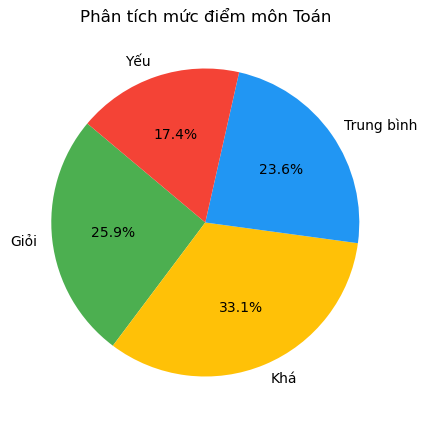

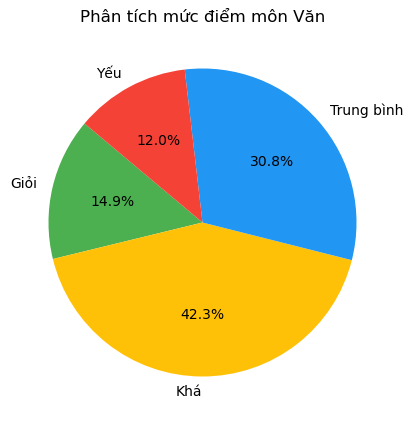

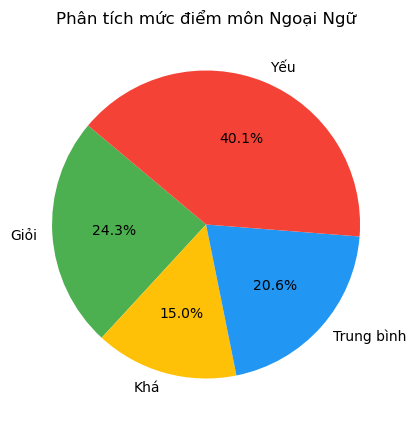

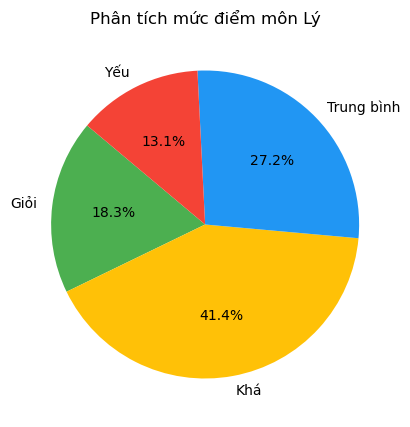

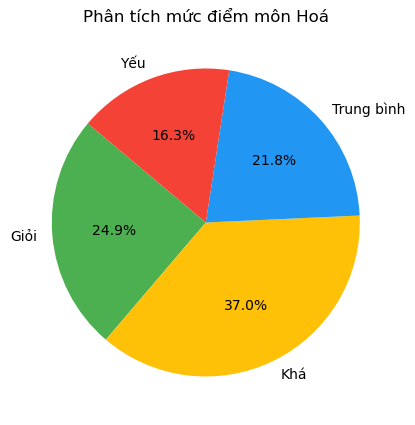

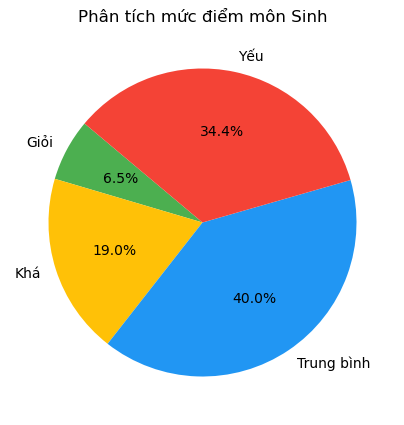

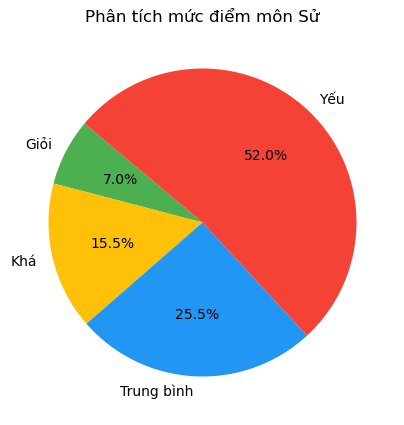

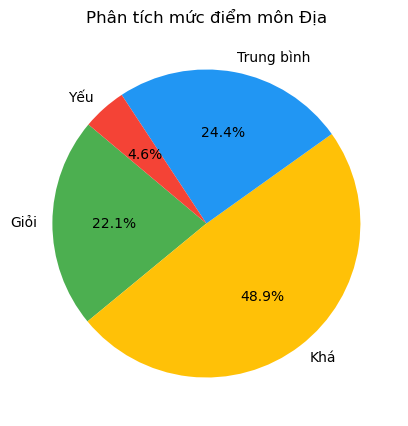

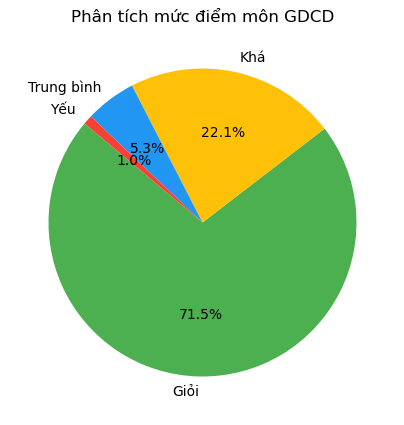

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
def classify(score):
    if score >= 8:
        return "Giỏi"
    elif score >= 6.5 and score < 8:
        return "Khá"
    elif score >= 5 and score < 6.5:
        return "Trung bình"
    else:
        return "Yếu"
subjects = ['Toán', 'Văn', 'Ngoại Ngữ', 'Lý', 'Hoá', 'Sinh', 'Sử', 'Địa', 'GDCD']
fixed_colors = {
    "Giỏi": "#4CAF50",       
    "Khá": "#FFC107",        
    "Trung bình": "#2196F3",
    "Yếu": "#F44336"         
}
for subject in subjects:
    if subject in df.columns:
        valid_scores = df[subject].dropna()
        if not valid_scores.empty:
            classified = valid_scores.apply(classify)
            counts = classified.value_counts()
            labels = list(fixed_colors.keys())
            sizes = [counts.get(label, 0) for label in labels]
            colors = [fixed_colors[label] for label in labels]
            plt.figure(figsize=(5, 5))
            plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
            plt.title(f"Phân tích mức điểm môn {subject}")
            plt.show()
        else:
            print(f"Môn {subject} không có dữ liệu hợp lệ.")

In [ ]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

# Đọc dữ liệu
df1 = pd.read_csv(r"C:\Users\Admin\Desktop\BTL_TDA\Data\diem_thi_2021.csv")
gdf = gpd.read_file(r"C:\Users\Admin\Desktop\BTL_TDA\gadm41_VNM_1.json\gadm41_VNM_1.json")

# Định nghĩa khối thi
blocks = {
    "A00": ["Toán", "Lý", "Hoá"],
    "B00": ["Toán", "Hoá", "Sinh"],
    "C00": ["Văn", "Sử", "Địa"],
    "D01": ["Toán", "Văn", "Ngoại Ngữ"],
    "A01": ["Toán", "Lý", "Ngoại Ngữ"],
    "D07": ["Toán", "Hoá", "Ngoại Ngữ"]
}

# Hàm xử lý dữ liệu cho từng khối thi
def process_block(df, gdf, block_name, subjects):
    # Loại bỏ các thí sinh thiếu điểm trong bất kỳ môn nào của khối
    df_block = df.dropna(subset=subjects)
    df_block['block_score'] = df_block[subjects].sum(axis=1)
    
    # Tính toán thống kê theo tỉnh
    grouped = df_block.groupby('province')
    median_score = grouped['block_score'].median()
    top_5_percent = grouped['block_score'].apply(lambda x: (x >= x.quantile(0.95)).sum())
    std_score = grouped['block_score'].std()

    # Tạo DataFrame thống kê
    stats = pd.DataFrame({
        'province': median_score.index,
        'median_score': median_score.values,
        'top_5_percent': top_5_percent.values,
        'std_score': std_score.values
    })

    # Ghép với dữ liệu hình học
    gdf_merged = gdf.merge(stats, left_on='NAME_1', right_on='province', how='left')
    gdf_merged = gdf_merged.fillna({'median_score': 0, 'top_5_percent': 0, 'std_score': 0})

    return gdf_merged

# Tạo biểu đồ cho từng khối
figures = {}
for block_name, subjects in blocks.items():
    # Xử lý dữ liệu cho khối thi
    gdf_block = process_block(df1, gdf, block_name, subjects)

    # Biểu đồ Median
    fig_median = px.choropleth(
        gdf_block,
        geojson=gdf_block.geometry,
        locations=gdf_block.index,
        color="median_score",
        hover_name="province",
        color_continuous_scale="Viridis",
        title=f"Median Score for Block {block_name}"
    )
    fig_median.update_geos(visible=False, fitbounds="locations", showcountries=False, showframe=False)

    # Biểu đồ Top 5%
    fig_top_5 = px.choropleth(
        gdf_block,
        geojson=gdf_block.geometry,
        locations=gdf_block.index,
        color="top_5_percent",
        hover_name="province",
        color_continuous_scale="YlGnBu",
        title=f"Top 5% Score for Block {block_name}"
    )
    fig_top_5.update_geos(visible=False, fitbounds="locations", showcountries=False, showframe=False)

    # Biểu đồ Standard Deviation
    fig_std = px.choropleth(
        gdf_block,
        geojson=gdf_block.geometry,
        locations=gdf_block.index,
        color="std_score",
        hover_name="province",
        color_continuous_scale="RdBu",
        title=f"Standard Deviation for Block {block_name}"
    )
    fig_std.update_geos(visible=False, fitbounds="locations", showcountries=False, showframe=False)

    # Lưu trữ biểu đồ
    figures[block_name] = {
        "median": fig_median,
        "top_5_percent": fig_top_5,
        "std_dev": fig_std
    }

# Hiển thị biểu đồ cho từng khối
for block_name, figs in figures.items():
    print(f"Block {block_name}:")
    figs["median"].show()
    figs["top_5_percent"].show()
    figs["std_dev"].show()
